In [1]:
# ### Finding Vesta and tracking its location

# Selected Topics in Natural and Applied Sciences - COMS-7840-001
# Submitted by:
  # Ali, Liaqat Momina

!pip install photutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import matplotlib.pyplot as plt
# from astropy.io import fits
# from astropy.visualization import ZScaleInterval, ImageNormalize
# from photutils.detection import DAOStarFinder
# from photutils.background import Background2D, MedianBackground
# from photutils.aperture import CircularAperture
# from astropy.stats import sigma_clipped_stats
# import numpy as np
# from astropy.stats import SigmaClip

In [3]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval, ImageNormalize
from photutils.detection import DAOStarFinder
from photutils.background import Background2D, MedianBackground
from photutils.aperture import CircularAperture
from astropy.stats import sigma_clipped_stats
import numpy as np
from astropy.stats import SigmaClip
fname='/content/drive/MyDrive/Fit Files'
fwhm=15
# Read the FITS file
# /content/drive/MyDrive/FindVesta/vesta-0828-30.fit

hdulist = fits.open(f'{fname}/vesta-0858-10.fit')
data = hdulist[0].data
print(hdulist[0].header)
hdulist.close()
# data = data[::-1,:]
sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
boxsz=(50,50)
bkg = Background2D(data, box_size=boxsz, filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
dataG=data-bkg.background
# Calculate statistics of the image
mean, median, std = sigma_clipped_stats(dataG)

# Increase contrast using histogram equalization
data_eq = (dataG - median) / std
data_eq = np.clip(data_eq, -5, 15)  # Clip values to improve contrast
data_eqG = (data_eq - np.min(data_eq)) / (np.max(data_eq) - np.min(data_eq))  # Normalize to [0, 1]

mean, median, std = sigma_clipped_stats(dataG, sigma=3.0)
daofind = DAOStarFinder(fwhm=fwhm, threshold=5.*std)
sources = daofind(dataG - median)



SIMPLE  =                    T                                                  BITPIX  =                   16                                                  NAXIS   =                    2                                                  NAXIS1  =                 4788                                                  NAXIS2  =                 3194                                                  BZERO   =              32768.0                                                  BSCALE  =                  1.0                                                  EXPTIME =                 10.0                                                  TEMPERAT=                 29.0                                                  DATE-OBS= '2024-03-14T01:56:00.356' / UT                                        JD      =     2460383.58055968                                                  DATE-LOC= '2024-03-13T20:56:00.356' / LT                                        RA      = '04:40:06.0'                  

435 Stars Detected


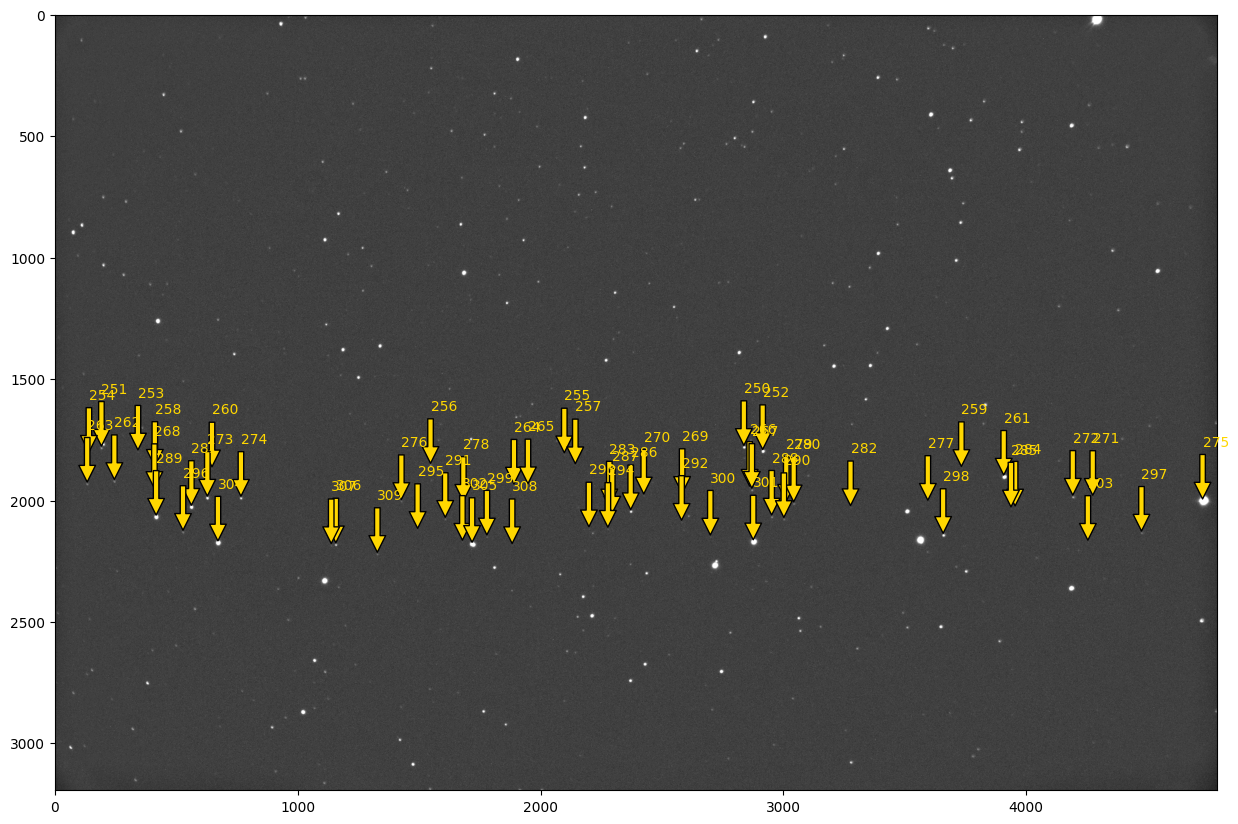

In [4]:
# # Display the image with enhanced contrast
plt.figure(figsize=(15, 15))
plt.imshow(data_eqG, cmap='gray')  # Setting origin to lower for FITS images
# Extract star positions
positionsG = list(zip(sources['xcentroid'], sources['ycentroid']))
print(f"{len(positionsG)} Stars Detected")
# Plot found stars on the image
aperturesG = CircularAperture(positionsG, r=15)
#aperturesG.plot(color='red', lw=1.5, alpha=1)
rangeTemp=range(250,310)
for i in (rangeTemp):
    plt.annotate(f'{i}', aperturesG.positions[i], textcoords="offset points", xytext=(0,40), ha='left',color='gold',arrowprops=dict(facecolor='gold', shrink=0.05))
# refIdxG=252 # index of reference star (Vesta) with Apparent Mag=7.90
# RealAppMag = 9.75
# Annotate the scatter plot
# Vesta has RA = 05h 41m40.3s & Dec = +24°02'22.7"
# plt.annotate(f'Vesta \nMag=7.90', aperturesG.positions[refIdxG], textcoords="offset points", xytext=(0,40), ha='left',color='gold',arrowprops=dict(facecolor='gold', shrink=0.05))


4726.623468206083
2004.5553715915821


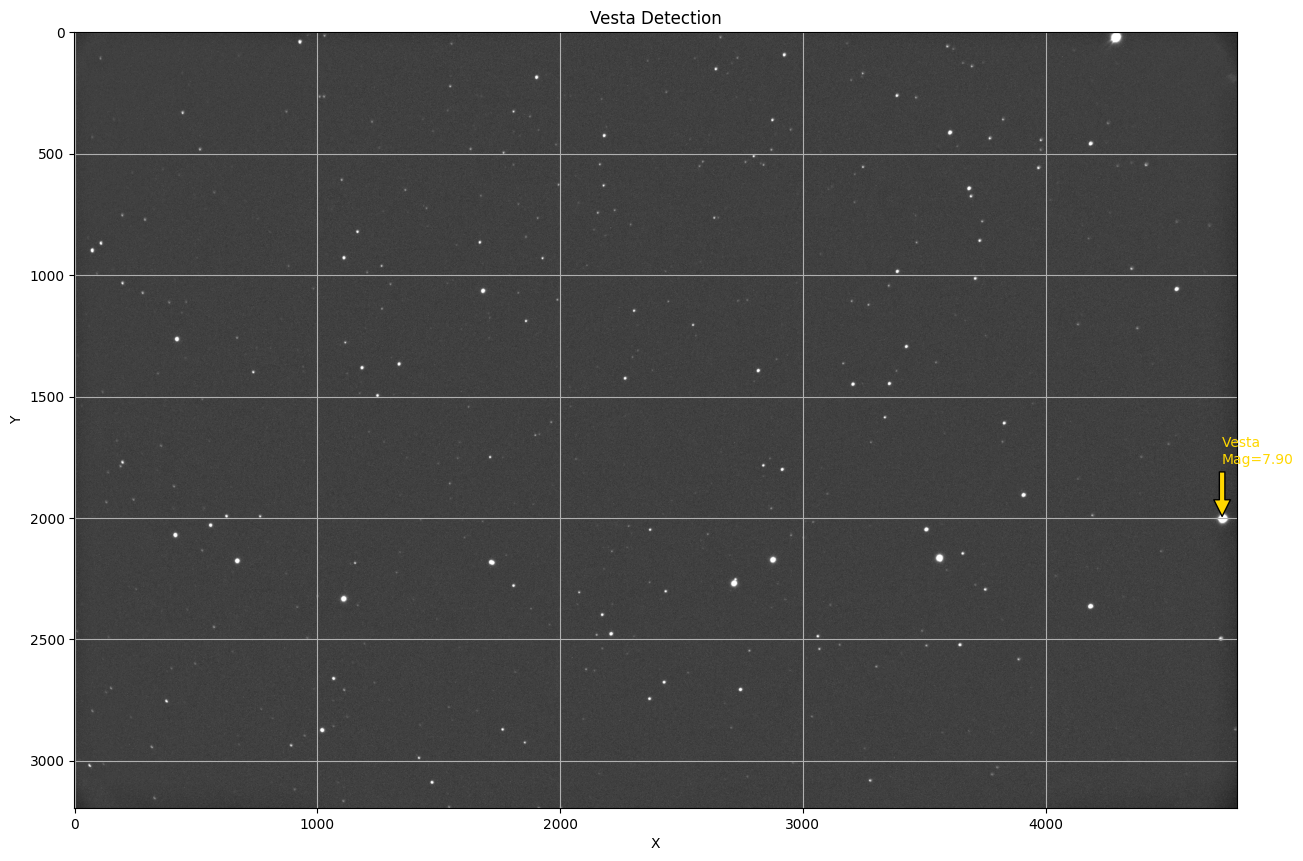

In [5]:
plt.figure(figsize=(15, 15))
plt.imshow(data_eqG, cmap='gray')

refIdxG = 275
ref_star_x = sources['xcentroid'][refIdxG]
print(ref_star_x)
ref_star_y = sources['ycentroid'][refIdxG]
print(ref_star_y)
plt.annotate(f'Vesta \nMag=7.90', aperturesG.positions[refIdxG], textcoords="offset points", xytext=(0,40), ha='left',color='gold',arrowprops=dict(facecolor='gold', shrink=0.05))

# plt.text(ref_star_x, ref_star_y, f'Vesta\nX: {ref_star_x}\nY: {ref_star_y}', color='red', fontsize=8, ha='center')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Vesta Detection")
plt.savefig(f"{fname}_StarDetect_G")
plt.show()
# plt.imshow(np.rot90(data_eqG, 3), cmap='gray', origin='lower')

In [ ]:
import os

# Directory containing the FITS files
dir = '/content/drive/MyDrive/Fit Files'

# List of FITS files in the directory
files = os.listdir(dir)
print(files)

# Select a FITS file by its index in the list

id = 3  # id = 0 is vesta-0828-30.fit
print(files[id])
# Open the FITS file
with fits.open(os.path.join(dir, files[id])) as hdul:
    # Access the primary header
    header = hdul[0].header
    header['RA'] = '05:40:06.0'

    # Iterate over each entry in the header and print
    for key, value in header.items():
        print(f"{key}: {value} // {header.comments[key]}")

    hdul.writeto(os.path.join(dir, files[id].replace('.fit', '_updated.fit')), overwrite=True) #Save modified fit


['vesta-0758-30.fit', 'vesta-0803-30.fit', 'vesta-0808-30.fit', 'vesta-0813-30.fit', 'vesta-0818-30.fit', 'vesta-0823-30.fit', 'vesta-0828-30.fit', 'vesta-0831-10.fit', 'vesta-0833-30.fit', 'vesta-0838-10.fit', 'vesta-0841-10.fit', 'vesta-0844-10.fit', 'vesta-0847-10.fit', 'vesta-0850-10.fit', 'vesta-0853-10.fit', 'vesta-0858-10.fit', '.ipynb_checkpoints', 'vesta-0858-10_updated.fit', 'vesta-0813-30_updated.fit']
vesta-0813-30.fit
SIMPLE: True // 
BITPIX: 16 // 
NAXIS: 2 // 
NAXIS1: 4788 // 
NAXIS2: 3194 // 
BZERO: 32768.0 // 
BSCALE: 1.0 // 
EXPTIME: 30.0 // 
TEMPERAT: 28.3 // 
DATE-OBS: 2024-03-14T01:13:00.168 // UT
JD: 2460383.55069639 // 
DATE-LOC: 2024-03-13T20:13:00.168 // LT
RA: 05:40:06.0 // 
DEC: +24:01:00 // 
OBJCTRA: 04 40 06.0 // 
OBJCTDEC: +24 01 00 // 
AVISUMIN: 1082.0 // 
AVISUMAX: 2183.0 // 
AVISUTYP: 0.0 // 
ROWORDER: BOTTOM-UP // 
CREATOR: Astroart 8.0 // 


To display updated RA

In [ ]:
# import os

# # Directory containing the FITS files
# dir = '/content/drive/MyDrive/FindVesta'

# List of FITS files in the directory
files = os.listdir(dir)
print(files)

# # Select a FITS file by its index in the list
id = 2  # id = 2 is updated_vesta_file

# Open the FITS file
with fits.open(os.path.join(dir, files[id])) as hdul:
    # Access the primary header
    header = hdul[0].header
    print("Updated RA is:", header['RA'])

    # # Iterate over each entry in the header and print
    # for key, value in header.items():
    #     print(f"{key}: {value} // {header.comments[key]}")

['vesta-0758-30.fit', 'vesta-0803-30.fit', 'vesta-0808-30.fit', 'vesta-0813-30.fit', 'vesta-0818-30.fit', 'vesta-0823-30.fit', 'vesta-0828-30.fit', 'vesta-0841-10.fit', 'vesta-0838-10.fit', 'vesta-0833-30.fit', 'vesta-0831-10.fit', 'vesta-0853-10.fit', 'vesta-0850-10.fit', 'vesta-0847-10.fit', 'vesta-0844-10.fit', 'vesta-0858-10.fit', '.ipynb_checkpoints']
Updated RA is: 04:40:00.0


In [10]:
from astropy.wcs import WCS
from astropy.wcs import Sip

import numpy as np

# Initialize a WCS object with specific dimensions
wcs = WCS(naxis=2)

# TAN-SIP Structure:
#   crval=(85.2395, 24.0109)
#   crpix=(1952.87, 2009.34)
#   CD = (   -0.0001078    -5.0333e-07 )
#        (   4.9031e-07    -0.00010778 )



# Set the CRVAL, CRPIX, and CD matrix
wcs.wcs.crval = [85.2395, 24.0109]  # RA, Dec
wcs.wcs.crpix = [1952.87, 2009.34]  # Reference pixel
wcs.wcs.cd = np.array([[( -0.0001078)-(0.00001),   (-5.0333e-07)],
                       [(4.9031e-07)-(0.0000001)   ,  -0.00010778 ]])
#831-10
# wcs.wcs.crval = [85.2395, 24.0109]  # RA, Dec
# wcs.wcs.crpix = [1738.95, 1586.22]  # Reference pixel
# wcs.wcs.cd = np.array([[(-0.00010778)-(0.000008) ,   (-4.4877e-07)],
#                        [4.3759e-07  ,  -0.0001078 ]])



# Define the SIP order
sip_order = 2  # Based on your provided data




# Initialize the A, B, AP, BP matrices with zeros
# The size of the matrices is (order+1) x (order+1)
a = np.zeros((sip_order+1, sip_order+1))
b = np.zeros((sip_order+1, sip_order+1))
ap = np.zeros((sip_order+1, sip_order+1))
bp = np.zeros((sip_order+1, sip_order+1))

#   SIP order: A=2, B=2, AP=2, BP=2
#   A =            0           0   3.935e-07
#                  0  7.3491e-08
#         2.8265e-07
#   B =            0           0 -6.0569e-08
#                  0  1.8584e-07
#        -2.6553e-09
#   AP =  -0.00056027  8.3151e-08 -3.9326e-07
#         7.1409e-07 -7.3386e-08
#        -2.8233e-07

# Fill in the non-zero SIP coefficients as provided
# A matrix coefficients
a[2, 0] = 2.8265e-07
a[1, 1] = 7.3491e-08
a[0, 2] = 3.935e-07

# B matrix coefficients
b[2, 0] = -2.6553e-09
b[1, 1] = 1.8584e-07
b[0, 2] = -6.0569e-08

# AP matrix coefficients
ap[0, 0] = -0.00056027
ap[1, 0] = 7.1409e-07
ap[2, 0] = -2.8233e-07
ap[0, 1] = 8.3151e-08
ap[1, 1] = -7.3386e-08
ap[0, 2] = -3.9326e-07
#   BP =   1.4547e-05  2.7185e-07  6.0557e-08
#        -2.6149e-0 -1.8573e-07
#         2.6523e-09

bp[0, 0] = 1.4547e-05
bp[1, 0] = -2.6149e-0
bp[2, 0] = 2.6523e-09
bp[0, 1] = 2.7185e-07
bp[1, 1] = -1.8573e-07
bp[0, 2] = 6.0557e-08

# Create the SIP object and assign it to the wcs
wcs.sip = Sip(a, b, ap, bp, wcs.wcs.crpix)


# Now, let's assume you want to convert pixel coordinates to RA and Dec:
# Here's an example pixel coordinate
pixel_x, pixel_y = ref_star_x, ref_star_y



# Convert pixel coordinates to sky coordinates (RA, Dec)
ra_dec_values = wcs.pixel_to_world(pixel_x, pixel_y)
print(ra_dec_values)


[<Quantity 84.91237969>, <Quantity 24.01239418>]


In [11]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Example values
ra_quantity = ra_dec_values[0] * u.degree
dec_quantity = ra_dec_values[1] * u.degree

# Convert to SkyCoord object
coord = SkyCoord(ra=ra_quantity, dec=dec_quantity)

# Get RA in hours, minutes, seconds
ra_hr, ra_min, ra_sec = coord.ra.hms

# Get Dec in degrees, arcminutes, arcseconds
dec_deg, dec_arcmin, dec_arcsec = coord.dec.dms

print(f"RA: {ra_hr:.0f}h {ra_min:.0f}m {ra_sec:.2f}s")
print(f"Dec: {dec_deg:.0f}° {dec_arcmin:.0f}' {dec_arcsec:.2f}''")

RA: 5h 39m 38.97s
Dec: 24° 0' 44.62''


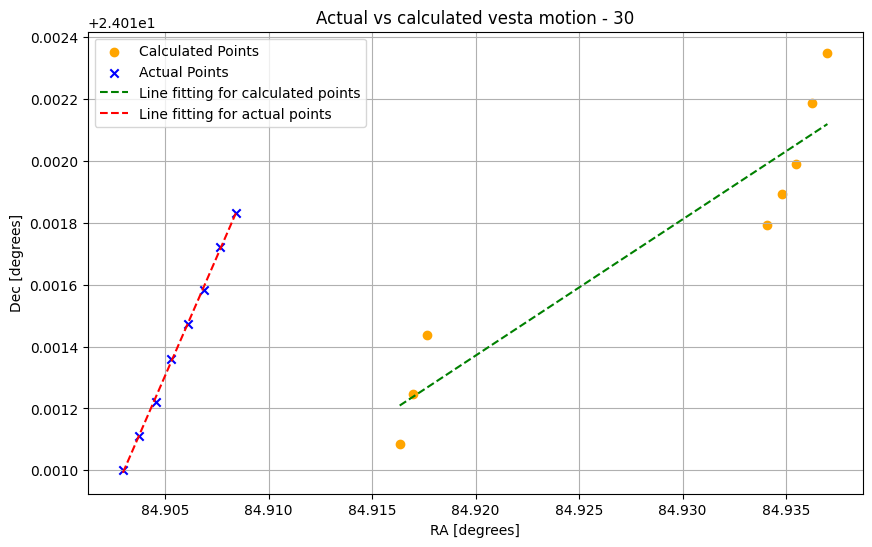

In [ ]:
#30 EXPOSURE
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.patches import FancyArrowPatch

# Data
ra_hours = [5, 5, 5, 5, 5, 5, 5, 5]
ra_minutes = [39, 39, 39, 39, 39, 39, 39, 39]
ra_seconds = np.array([39.92, 40.08, 40.24, 44.18, 44.35, 44.51, 44.70, 44.88])
ra_secondsUpdated = []


# print(ra_secondsUpdated)

dec_degrees = [24, 24, 24, 24, 24, 24, 24, 24]
dec_arcminutes = [0, 0, 0, 0, 0, 0, 0, 0]
dec_arcseconds = [39.90, 40.49, 41.18, 42.46, 42.81, 43.17, 43.88, 44.46]

ra_hours_actual = [5, 5, 5, 5, 5, 5, 5, 5]
ra_minutes_actual = [39, 39, 39, 39, 39, 39, 39, 39]
ra_seconds_actual = np.array([36.71, 36.90, 37.09, 37.27, 37.46, 37.65, 37.84, 38.02])

# Define a polynomial function for curve fitting
# def poly_func(x, *coeffs):
#     return sum([coeffs[i] * x**i for i in range(len(coeffs))])

# # Fit the polynomial function to the data
# coeffs, _ = curve_fit(poly_func, ra_seconds, ra_seconds_actual, p0=(1, 1, 1, 1, 1))

# # Use the fitted polynomial to predict the actual ra_seconds values
# ra_seconds_aligned = poly_func(ra_seconds, *coeffs)

# print(ra_seconds_aligned)


# for i in range(len(ra_seconds)):
#     ra_secondsUpdated.append(((ra_seconds[i]+ra_seconds_actual[i])/2)-2)

dec_degrees_actual = [24, 24, 24, 24, 24, 24, 24, 24]
dec_arcminutes_actual = [0, 0, 0, 0, 0, 0, 0, 0]
dec_arcseconds_actual = [39.6, 40.0, 40.4, 40.9, 41.3, 41.7, 42.2, 42.6]

# Convert RA to decimal degrees
ra_decimal = [(hours + minutes/60 + seconds/3600) * 15 for hours, minutes, seconds in zip(ra_hours, ra_minutes, ra_seconds)]

# Convert Dec to decimal degrees
dec_decimal = [degrees + arcminutes/60 + arcseconds/3600 for degrees, arcminutes, arcseconds in zip(dec_degrees, dec_arcminutes, dec_arcseconds)]


# Convert RA to decimal degrees
ra_decimal_actual = [(hours + minutes/60 + seconds/3600) * 15 for hours, minutes, seconds in zip(ra_hours_actual, ra_minutes_actual, ra_seconds_actual)]

# Convert Dec to decimal degrees
dec_decimal_actual = [degrees + arcminutes/60 + arcseconds/3600 for degrees, arcminutes, arcseconds in zip(dec_degrees_actual, dec_arcminutes_actual, dec_arcseconds_actual)]




# Fit two straight lines through the new points
coefficients_1 = np.polyfit(ra_decimal, dec_decimal, 1)
polynomial_1 = np.poly1d(coefficients_1)
x_1 = np.linspace(min(ra_decimal), max(ra_decimal), 100)
y_1 = polynomial_1(x_1)

coefficients_2 = np.polyfit(ra_decimal_actual, dec_decimal_actual, 1)
polynomial_2 = np.poly1d(coefficients_2)
x_2 = np.linspace(min(ra_decimal_actual), max(ra_decimal_actual), 100)
y_2 = polynomial_2(x_2)



# # Plot both sets of points and the fitted lines
# plt.figure(figsize=(10, 6))
# plt.scatter(ra_decimal, dec_decimal, color='orange', label='Calculated Points')
# plt.scatter(ra_decimal_actual, dec_decimal_actual, color='red', label='Actual Points')
# plt.plot(x_1, y_1, color='green',linestyle='--', label='Line fitting for calculated points',)
# plt.plot(x_2, y_2, color='red',linestyle='--', label='Line fitting for actual points')

# plt.xlabel('RA [degrees]')
# plt.ylabel('Dec [degrees]')
# plt.title('Actual vs calculated vesta motion - 30')
# plt.legend()
# plt.grid(True)
# plt.xlim(min(ra_decimal) - 0.0001, max(ra_decimal) + 0.0001)
# plt.ylim(min(dec_decimal) - 0.1, max(dec_decimal) + 0.1)
# plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(ra_decimal, dec_decimal, color='orange', label='Calculated Points')
plt.scatter(ra_decimal_actual, dec_decimal_actual, color='blue', label='Actual Points', marker='x')  # Use a different color and marker for actual points
plt.plot(x_1, y_1, color='green', linestyle='--', label='Line fitting for calculated points')
plt.plot(x_2, y_2, color='red', linestyle='--', label='Line fitting for actual points')

plt.xlabel('RA [degrees]')
plt.ylabel('Dec [degrees]')
plt.title('Actual vs calculated vesta motion - 30')
plt.legend()
plt.grid(True)
# plt.xlim(min(ra_decimal) - 0.001, max(ra_decimal) + 0.001)  # Adjusted xlim to include more space
# plt.ylim(min(dec_decimal) - 0.5, max(dec_decimal) + 0.5)  # Adjusted ylim to include more space
plt.show()




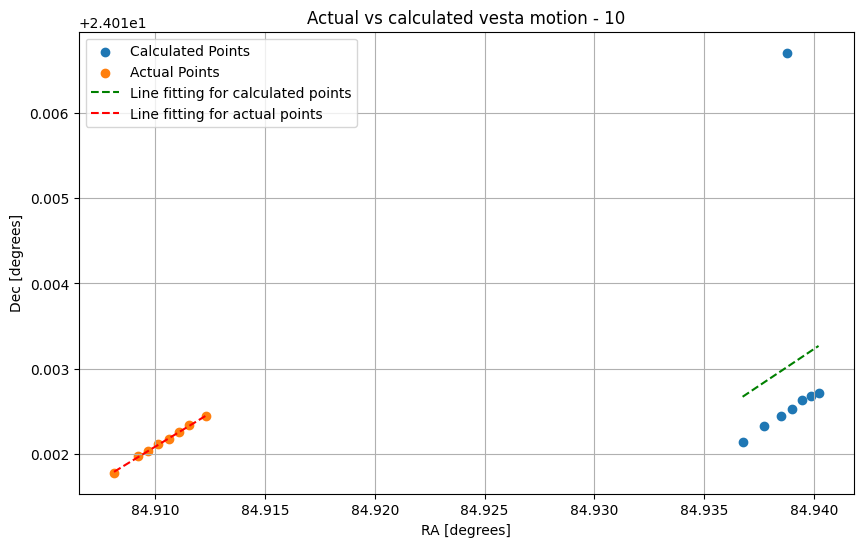

In [ ]:
#10 FOCAL LENGTH
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.patches import FancyArrowPatch

# Data
ra_hours = [5, 5, 5, 5, 5, 5, 5, 5]
ra_minutes = [39, 39, 39, 39, 39, 39, 39, 39]
ra_seconds = np.array([44.82, 45.05, 45.31, 45.24, 45.36, 45.47, 45.57, 45.65])
ra_secondsUpdated = []


# print(ra_secondsUpdated)

dec_degrees = [24, 24, 24, 24, 24, 24, 24, 24]
dec_arcminutes = [0, 0, 1, 0, 0, 0, 0, 0]
dec_arcseconds = [43.68, 44.38, 0.15, 44.79, 45.10, 45.47, 45.65, 45.78]

ra_hours_actual = [5, 5, 5, 5, 5, 5, 5, 5]
ra_minutes_actual = [39, 39, 39, 39, 39, 39, 39, 39]
ra_seconds_actual = np.array([37.95, 38.21, 38.32, 38.43, 38.55, 38.66, 38.77, 38.96])
# 6.87, 6.84, 6.99, 6.81,
# Define a polynomial function for curve fitting
# def poly_func(x, *coeffs):
#     return sum([coeffs[i] * x**i for i in range(len(coeffs))])

# # Fit the polynomial function to the data
# coeffs, _ = curve_fit(poly_func, ra_seconds, ra_seconds_actual, p0=(1, 1, 1, 1, 1))

# Use the fitted polynomial to predict the actual ra_seconds values
# ra_seconds_aligned = poly_func(ra_seconds, *coeffs)

# print(ra_seconds_aligned)


# for i in range(len(ra_seconds)):
#     ra_secondsUpdated.append(((ra_seconds[i]+ra_seconds_actual[i])/2)-2)

dec_degrees_actual = [24, 24, 24, 24, 24, 24, 24, 24]
dec_arcminutes_actual = [0, 0, 0, 0, 0, 0, 0, 0]
dec_arcseconds_actual = [42.4, 43.1, 43.3, 43.6, 43.84, 44.1, 44.4, 44.8]

# Convert RA to decimal degrees
ra_decimal = [(hours + minutes/60 + seconds/3600) * 15 for hours, minutes, seconds in zip(ra_hours, ra_minutes, ra_seconds)]

# Convert Dec to decimal degrees
dec_decimal = [degrees + arcminutes/60 + arcseconds/3600 for degrees, arcminutes, arcseconds in zip(dec_degrees, dec_arcminutes, dec_arcseconds)]


# Convert RA to decimal degrees
ra_decimal_actual = [(hours + minutes/60 + seconds/3600) * 15 for hours, minutes, seconds in zip(ra_hours_actual, ra_minutes_actual, ra_seconds_actual)]

# Convert Dec to decimal degrees
dec_decimal_actual = [degrees + arcminutes/60 + arcseconds/3600 for degrees, arcminutes, arcseconds in zip(dec_degrees_actual, dec_arcminutes_actual, dec_arcseconds_actual)]




# Fit two straight lines through the new points
coefficients_1 = np.polyfit(ra_decimal, dec_decimal, 1)
polynomial_1 = np.poly1d(coefficients_1)
x_1 = np.linspace(min(ra_decimal), max(ra_decimal), 100)
y_1 = polynomial_1(x_1)

coefficients_2 = np.polyfit(ra_decimal_actual, dec_decimal_actual, 1)
polynomial_2 = np.poly1d(coefficients_2)
x_2 = np.linspace(min(ra_decimal_actual), max(ra_decimal_actual), 100)
y_2 = polynomial_2(x_2)



# Plot both sets of points and the fitted lines
plt.figure(figsize=(10, 6))
plt.scatter(ra_decimal, dec_decimal, label='Calculated Points')
plt.scatter(ra_decimal_actual, dec_decimal_actual, label='Actual Points')
plt.plot(x_1, y_1, color='green',linestyle='--', label='Line fitting for calculated points',)
plt.plot(x_2, y_2, color='red',linestyle='--', label='Line fitting for actual points')

plt.xlabel('RA [degrees]')
plt.ylabel('Dec [degrees]')
plt.title('Actual vs calculated vesta motion - 10')
plt.legend()
plt.grid(True)
# plt.xlim(min(ra_decimal) - 0.0001, max(ra_decimal) + 0.0001)
# plt.ylim(min(dec_decimal) - 0.1, max(dec_decimal) + 0.1)
plt.show()


